In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from transformers import T5Tokenizer, T5ForConditionalGeneration
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
# 1)	Web scrape Wikipedia page of Country allocated
Germanywiki = requests.get("https://en.wikipedia.org/wiki/Germany")

In [ ]:
Germanydf=BeautifulSoup(Germanywiki.content,"lxml")

In [ ]:
Germanytxt=Germanydf.get_text(strip=True) # Changed 'scrip' to 'strip' to remove leading/trailing spaces from the extracted text.

In [ ]:
Germanytxt

'Germany - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Etymology2HistoryToggle History subsection2.1Prehistory2.2Germanic tribes, Roman frontier and the Frankish Empire2.3East Francia and the Holy Roman Empire2.4German Confederation and Empire2.5Weimar Republic and Nazi Germany2.6East and West Germany2.7Reunified Germany and the European Union3GeographyToggle Geography subsection3.1Climate3.2Biodiversity4PoliticsToggle Politics subsection4.1Constituent states4.2Law4.3Foreign relations4.4Military5EconomyToggle Economy subsection5.1Infrastructure5.2Tourism6DemographicsToggle Demographics subsection6.1Religion6.2Languages6.3Education6.4Healt

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def scrape_wikipedia_text(url):
    """Scrape Wikipedia page and extract only text."""
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to retrieve page, status code: {response.status_code}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text_content = '\n'.join([para.get_text() for para in paragraphs if para.get_text().strip()])

    return text_content

In [ ]:
def clean_text(text):
    """Remove references and extra whitespace from text."""
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [ ]:
def analyze_sentiment(sentence):
    """Classify sentiment as Positive or Negative using TextBlob."""
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    return 'Neutral'

In [ ]:
def apply_tfidf(sentences):
    """Convert sentences into TF-IDF vectors."""
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    return pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
def balance_sentiment_with_smote(tfidf_features, sentiments):
    """Apply SMOTE to balance sentiment classes."""
    label_encoder = LabelEncoder()
    sentiment_labels = label_encoder.fit_transform(sentiments)  # Convert labels to numbers
    smote = SMOTE(random_state=42)
    tfidf_resampled, sentiment_resampled = smote.fit_resample(tfidf_features, sentiment_labels)
    sentiment_resampled_labels = label_encoder.inverse_transform(sentiment_resampled)  # Convert back to original labels
    return tfidf_resampled, sentiment_resampled_labels


In [ ]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train and evaluate a machine learning model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}\nAccuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*60)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

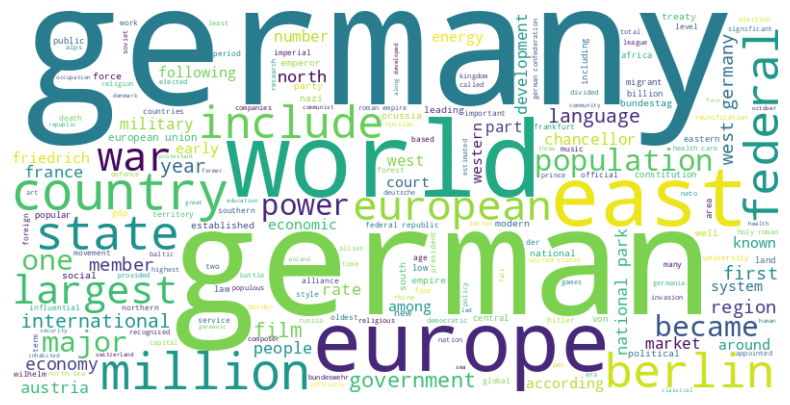

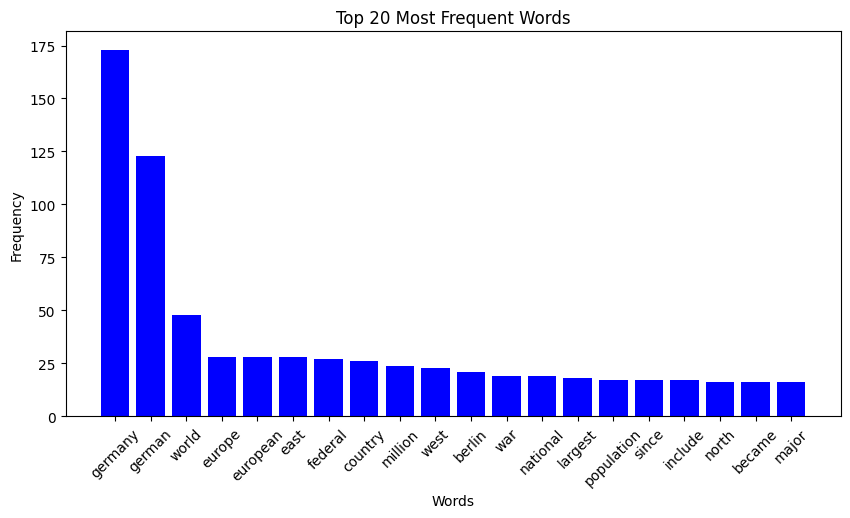

Model: Logistic Regression
Accuracy: 0.9394
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.91      0.97      0.94        33

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66

Model: Decision Tree
Accuracy: 0.8636
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.83      0.91      0.87        33

    accuracy                           0.86        66
   macro avg       0.87      0.86      0.86        66
weighted avg       0.87      0.86      0.86        66

Model: Random Forest
Accuracy: 0.8939
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.84      0.97      0.90        33

    accuracy                           0.89        66
   macro

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
if __name__ == "__main__":
    url = "https://en.wikipedia.org/wiki/Germany"
    scraped_text = scrape_wikipedia_text(url)

    if scraped_text:
        cleaned_text = clean_text(scraped_text)


        sentences = sent_tokenize(cleaned_text)  # Step 4: Sentence Tokenization

        # Sentiment Analysis
        sentiments = [analyze_sentiment(sentence) for sentence in sentences]

        # Create DataFrame
        df = pd.DataFrame({'Sentence': sentences, 'Sentiment': sentiments})

        #  Word Tokenization
        words = word_tokenize(cleaned_text.lower())

        # Step 8: Remove Stopwords
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

        #  Word Cloud Visualization
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

        # Frequent Words with Frequency Count
        word_freq = Counter(filtered_words).most_common(20)
        words, freqs = zip(*word_freq)
        plt.figure(figsize=(10, 5))
        plt.bar(words, freqs, color='blue')
        plt.xticks(rotation=45)
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title('Top 20 Most Frequent Words')
        plt.show()

        #  TF-IDF Vectorization
        tfidf_df = apply_tfidf(sentences)

        #  Filter Positive and Negative Sentiments Only
        filtered_sentences = [sentences[i] for i in range(len(sentences)) if sentiments[i] != 'Neutral']
        filtered_sentiments = [sentiments[i] for i in range(len(sentiments)) if sentiments[i] != 'Neutral']
        tfidf_filtered_df = apply_tfidf(filtered_sentences)

        #  Apply SMOTE for Balancing
        tfidf_resampled, sentiment_resampled = balance_sentiment_with_smote(tfidf_filtered_df, filtered_sentiments)

        #  Train Machine Learning Models
        label_encoder = LabelEncoder()
        y_resampled = label_encoder.fit_transform(sentiment_resampled)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(tfidf_resampled, y_resampled, test_size=0.2, random_state=42)

        # Models
        models = {
            "Logistic Regression": LogisticRegression(),
            "Decision Tree": DecisionTreeClassifier(),
            "Random Forest": RandomForestClassifier(),
            "Gradient Boosting": GradientBoostingClassifier(),
            "Naïve Bayes": MultinomialNB(),
            "K-Nearest Neighbors": KNeighborsClassifier()
        }

        for model_name, model in models.items():
            train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name)

In [ ]:
# Bonus Task LDA